In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

### 1. Get Enrichr counts

In [4]:
# Make counts
count_dataframe = pd.read_feather('./feather.dir/list_off_co.feather').set_index('gene_symbol')

# Get counts
gene_count_dataframe = pd.Series(np.diag(count_dataframe), index=count_dataframe.index, name='counts').to_frame()
gene_count_dataframe.head()

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



counts
gene_symbol        
A1BGAS1         821
A1CF           2776
A2M            8431
A2ML1          2677
A2MP1           324

### 2. Get RIF publications

In [5]:
# List
rif_counts = []

# Read
for infile in glob.glob('feather.dir/*_overlap.feather'):
    rif_dataframe = pd.read_feather(infile).set_index('gene_symbol')
    rif_count_dataframe = pd.Series(np.diag(rif_dataframe), name=os.path.basename(infile).split('_')[0], index=rif_dataframe.index).to_frame()
    rif_counts.append(rif_count_dataframe)
    
# Merge
rif_counts_dataframe = rif_counts[0].merge(rif_counts[1], left_index=True, right_index=True)
rif_counts_dataframe.head()

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



autorif  generif
gene_symbol                    
1300017J02RIK        1        1
1700013H16RIK        1        4
1700093K21RIK        1        1
2010109I03RIK        1        1
2410089E03RIK        1        1

In [53]:
# Get biotype
biotype_dataframe = pd.read_table('./rawdata.dir/gene_biotypes.txt', index_col='Gene name').rename(columns={'Gene type': 'gene_type'})
biotype_dataframe.head()

gene_type
Gene name           
MIR4723        miRNA
RF00019     misc_RNA
RF02116     misc_RNA
MIR6085        miRNA
RNU6-1328P     snRNA

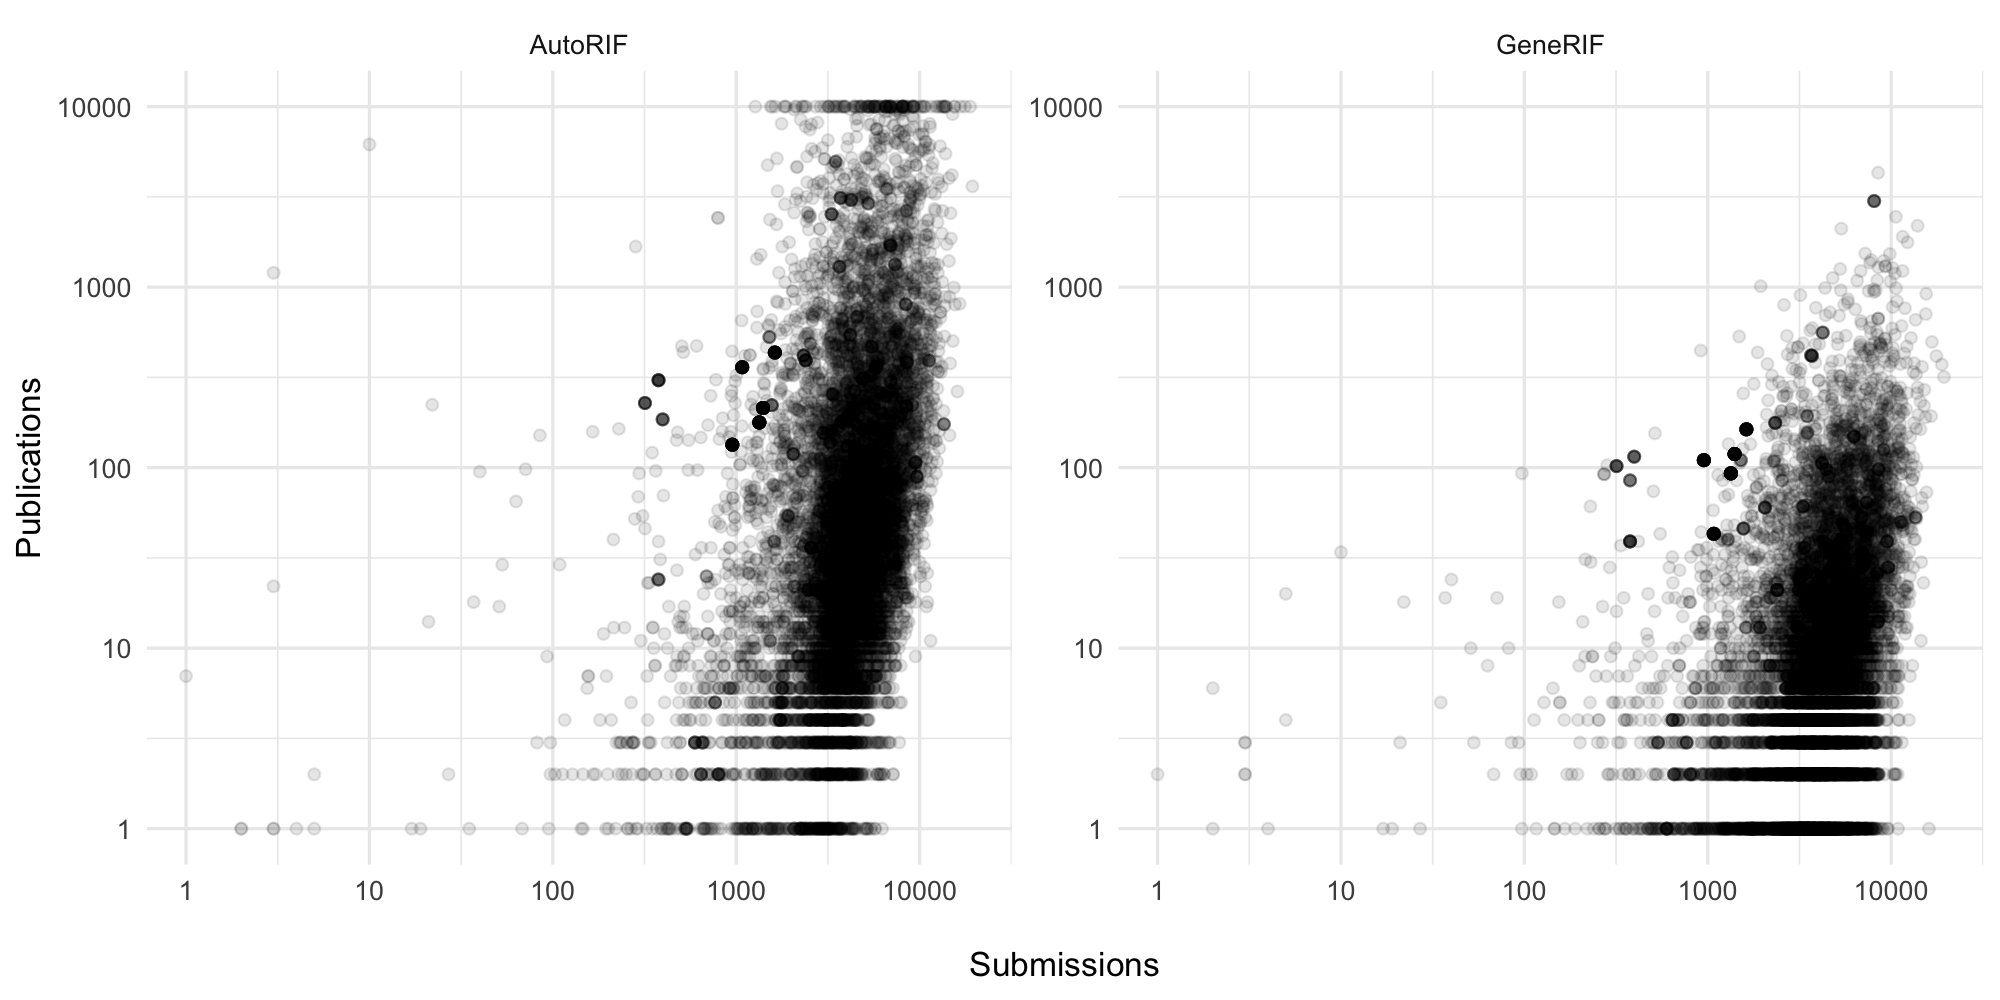

In [64]:
%%R -i plot_dataframe -h 1000 -w 2000 -r 220
ticks <- 10^seq(0, 4, by=1)
ggplot(plot_dataframe, aes(x=counts, y=value)) +
geom_point(alpha=0.1) +
# geom_rug(alpha=0.1) + 
# geom_bin2d(bins=60) +
facet_wrap(~variable, scales='free') +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
# scale_x_log10() +
# scale_y_log10() +
scale_x_continuous(breaks=ticks, labels=ticks, trans='log10') +
scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
xlab('\nSubmissions') +
ylab('Publications') +
theme_minimal()